In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
from js import fetch
import io

URL= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp= await fetch(URL)
boston_url=io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

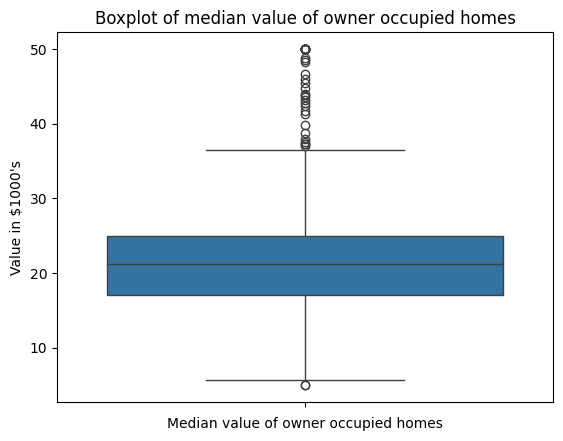

In [6]:
#For the "Median value of owner-occupied homes" provide a boxplot
f1=sns.boxplot(y='MEDV', data=boston_df)
f1.set(xlabel="Median value of owner occupied homes", ylabel="Value in $1000's", title="Boxplot of median value of owner occupied homes")
pyplot.show()
#Explanation: the median value of the owner occupied homes are around $20000 and multiple outlier values were identified for which the values of the owner occupied homes exceeded more than $40000

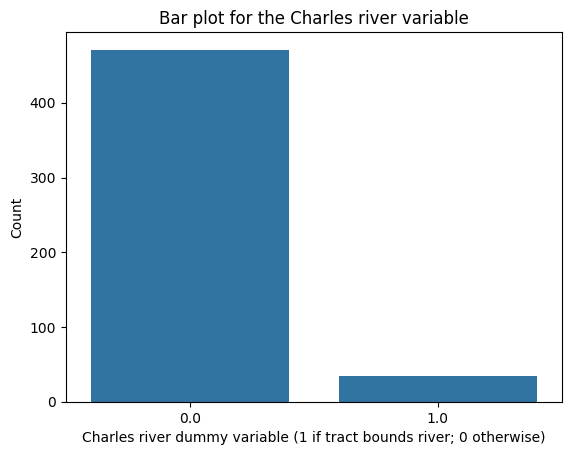

In [8]:
#Provide a bar plot for the Charles river variable
a=boston_df.groupby("CHAS")
a.count()
f2=sns.countplot(x='CHAS', data=boston_df)
f2.set(xlabel="Charles river dummy variable (1 if tract bounds river; 0 otherwise)",ylabel="Count", title='Bar plot for the Charles river variable')
pyplot.show()
#Explanation: The number of houses bounded by the Charls river (35) is much lower compared to those which aren't bounded by the Charles river (471)

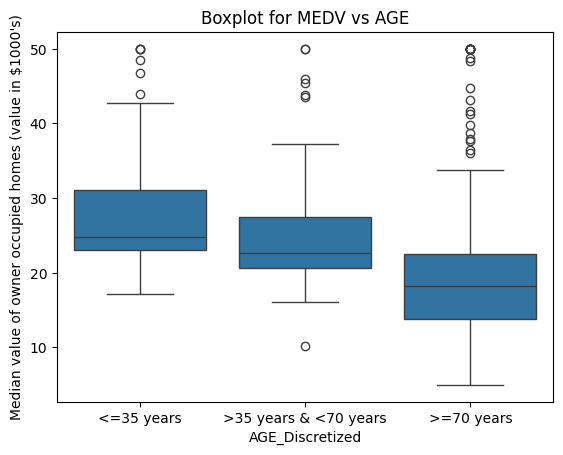

In [20]:
#Provie a boxplot for the MEDV vriable vs the AGE variable

boston_df['age_disc']=pd.cut(x=boston_df['AGE'],bins=[0,35,70,float('inf')],labels=["<=35 years",">35 years & <70 years",">=70 years"])
f3= sns.boxplot(x='age_disc', y='MEDV', data=boston_df)
f3.set(xlabel="AGE_Discretized",ylabel="Median value of owner occupied homes (value in $1000's)", title='Boxplot for MEDV vs AGE')
pyplot.show()

#Explanation: on average, the median value of the owner-occupied homes is higher for the houses in lower age buckets

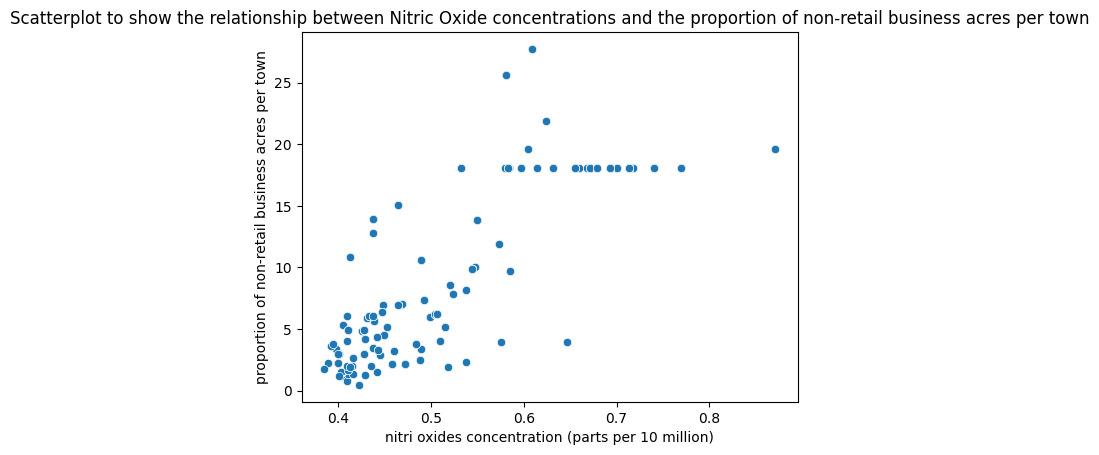

In [13]:
#Provide a scatterplot to show the relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.
f4=sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
f4.set(xlabel="nitri oxides concentration (parts per 10 million)",ylabel="proportion of non-retail business acres per town", title='Scatterplot to show the relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town')
pyplot.show()
#Explanation: there seems to be a positive correlation between Nitric Oxide concentrations and the proportion of non-retail business acres per town.

<ipython-input-16-a2582d4cf108>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f5=sns.distplot(boston_df['PTRATIO'],kde=False)


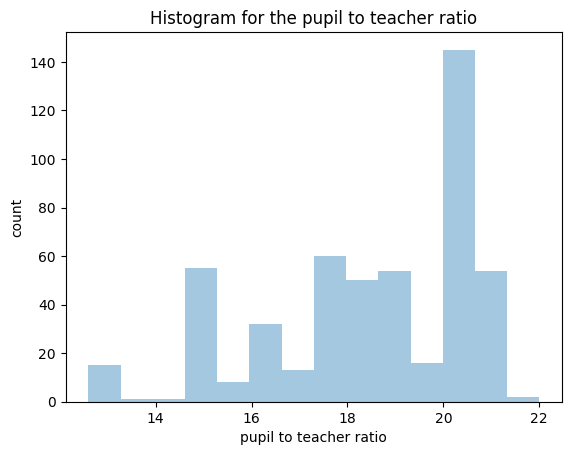

In [16]:
#Create a histogram for the pupil to teacher ratio variable
f5=sns.distplot(boston_df['PTRATIO'],kde=False)
f5.set(xlabel="pupil to teacher ratio", ylabel="count", title='Histogram for the pupil to teacher ratio')
pyplot.show()

#Explanation: pupil to teacher ratio appears to greatly vary depending on the town. For majority of towns, this tatio is at around 20

In [ ]:
Is there a significant difference in median value of houses bounded by the Charles river or not?
we take H0: M0=M1 i.e. no difference in median value of houses bounded by the Charles river vs the houses not bounded by the Charles river
        H1: M0!= M1 i.e. there are differences in median value of houses bounded by Charles river
alpha=0.05

In [18]:
print(scipy.stats.levene(boston_df[boston_df['CHAS']==1.0]['MEDV'],boston_df[boston_df['CHAS']==0.0]['MEDV']))
#as the p-value for the above test is less than the alpha value, we can reject the null hypothesis of both groups having equal variance and thus continue with t-test
print(scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1.0]['MEDV'],boston_df[boston_df['CHAS']==0.0]['MEDV'],equal_var=False))

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)
TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


In [ ]:
Based on the test results above, since the p-value=0.0036 is less than the alpha value, we can reject the null hypothesis and conclude that there are difference in median values of houses bounded the Charles river

In [ ]:
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

we take H0: M1=M2=M3 i.e. no difference in median value of houses for each proportion of owner occupied units built prior to 1940
        H1: at least one of them differ
alpha=0.05

In [21]:
scipy.stats.levene(boston_df[boston_df['age_disc']=='<=35 years']['MEDV'],
                  boston_df[boston_df['age_disc']=='>35 years & <70 years']['MEDV'],
                  boston_df[boston_df['age_disc']=='>=70 years']['MEDV'])
#Based on the test results above, since the p-value=0.032 is less than the alpha value, we can conclude that the variance of these groups are not equal

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [22]:
thirtyfive_lower=boston_df[boston_df['age_disc']=='<=35 years']['MEDV']
thirtyfive_seventy=boston_df[boston_df['age_disc']=='>35 years & <70 years']['MEDV']
seventy_older=boston_df[boston_df['age_disc']=='>=70 years']['MEDV']
f_statistic, p_value= scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_stat:{0}, P_value: {1}".format(f_statistic, p_value))

F_stat:36.40764999196599, P_value: 1.7105011022702984e-15


In [ ]:
Since the p-value is less than alpha, we will reject the null hypothesis and conclude that there is significant evidence that the median values of houses for at least one proportion of owner occupied units built priot to 1940 differ

In [ ]:
Can we conclude that there is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town?

H0: cor(NOX, INDUS)=0
H1: cor(NOX, INDUS) !=0
alpha=0.05

In [23]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
Since the p-value is less than alpha, we will reject the null hypothesis and conclude that there is significant evidence that there is a relationship between Nitric Oxide concentrations and proportions of non-retail business acres per town

In [ ]:
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

H0: b1=0 i.e. weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes
H1: b1!=0 i.e. weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes

In [25]:
X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        20:48:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
The p-value is less than alpha, so we reject the null hypothesis and conclude that there is evidence that weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.
The coefficient 1.092 means that an additional weighted distance to the five Boston employment centres increases the median value of the owner occupied homes by $1092.